In [1]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 0s (838 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 160706 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [2]:
!pip install pdf2image

In [5]:
!pip install easyocr

     |████████████████████████████████| 63.2MB 72kB/s 


In [6]:
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw
import spacy

In [8]:
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [49]:
images = convert_from_path('💻 Google Summer of Code (TensorFlow).pdf')

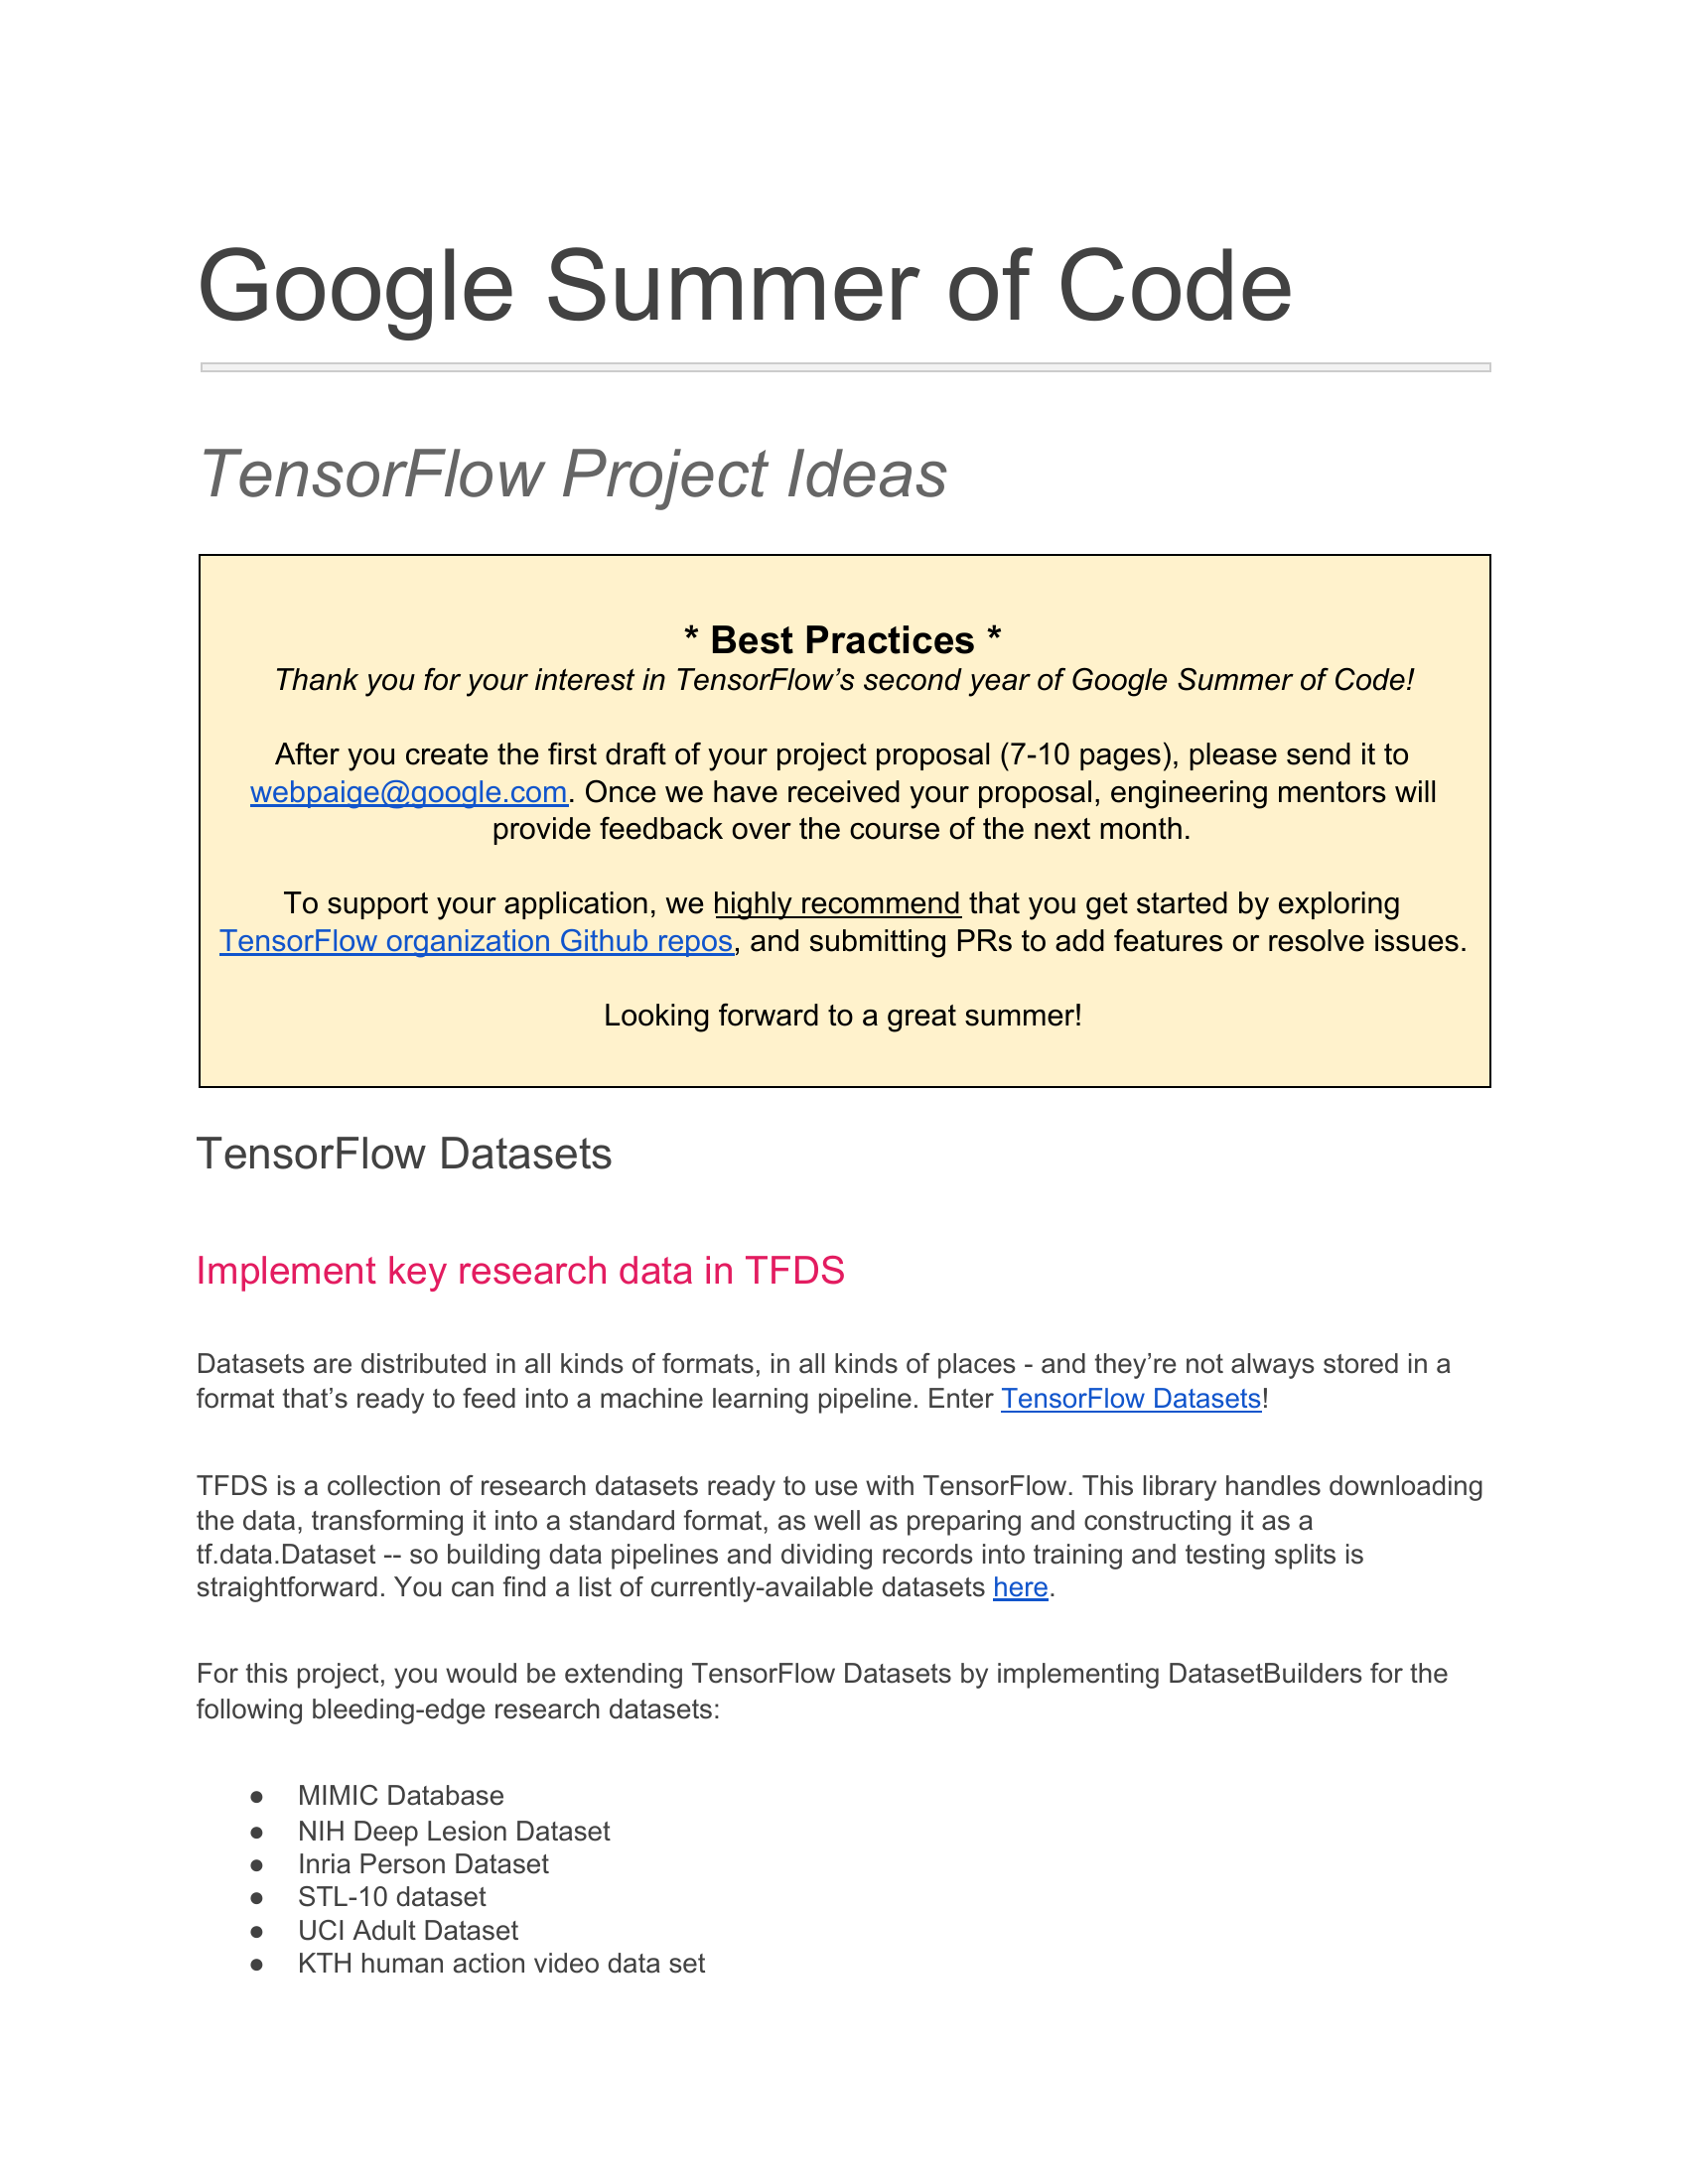

13


In [50]:
from IPython.display import display, Image
display(images[0])
print(len(images))

In [51]:
type(images)

list

In [52]:
bounds = reader.readtext(np.array(images[0]),min_size = 0,slope_ths = 0.2,ycenter_ths = 0.7,height_ths = 0.6,width_ths = 0.8,decoder = 'beamsearch',beamWidth=10)
bounds

[([[191, 235], [1316, 235], [1316, 357], [191, 357]],
  'Google Summer of Code',
  0.988556502589325),
 ([[199, 442], [964, 442], [964, 522], [199, 522]],
  'TensorFlow Project Ideas',
  0.9979606435162781),
 ([[713, 622], [1013, 622], [1013, 665], [713, 665]],
  'Best Practices *',
  0.9105719481187741),
 ([[275, 666], [1431, 666], [1431, 708], [275, 708]],
  "Thank you for your interest in TensorFlow's second year of Google Summer f Codel",
  0.7954575775895134),
 ([[275, 740], [1425, 740], [1425, 784], [275, 784]],
  'After you create the first draft of your project proposal (7-10 pages) , please send it to',
  0.774564809393817),
 ([[249, 781], [1453, 781], [1453, 822], [249, 822]],
  'webpaige@google com: Once we have received your proposal, engineering mentors will',
  0.8586875169561909),
 ([[489, 816], [1201, 816], [1201, 857], [489, 857]],
  'provide feedback over the course of the next month:',
  0.936243083876071),
 ([[283, 889], [1415, 889], [1415, 934], [283, 934]],
  'To 

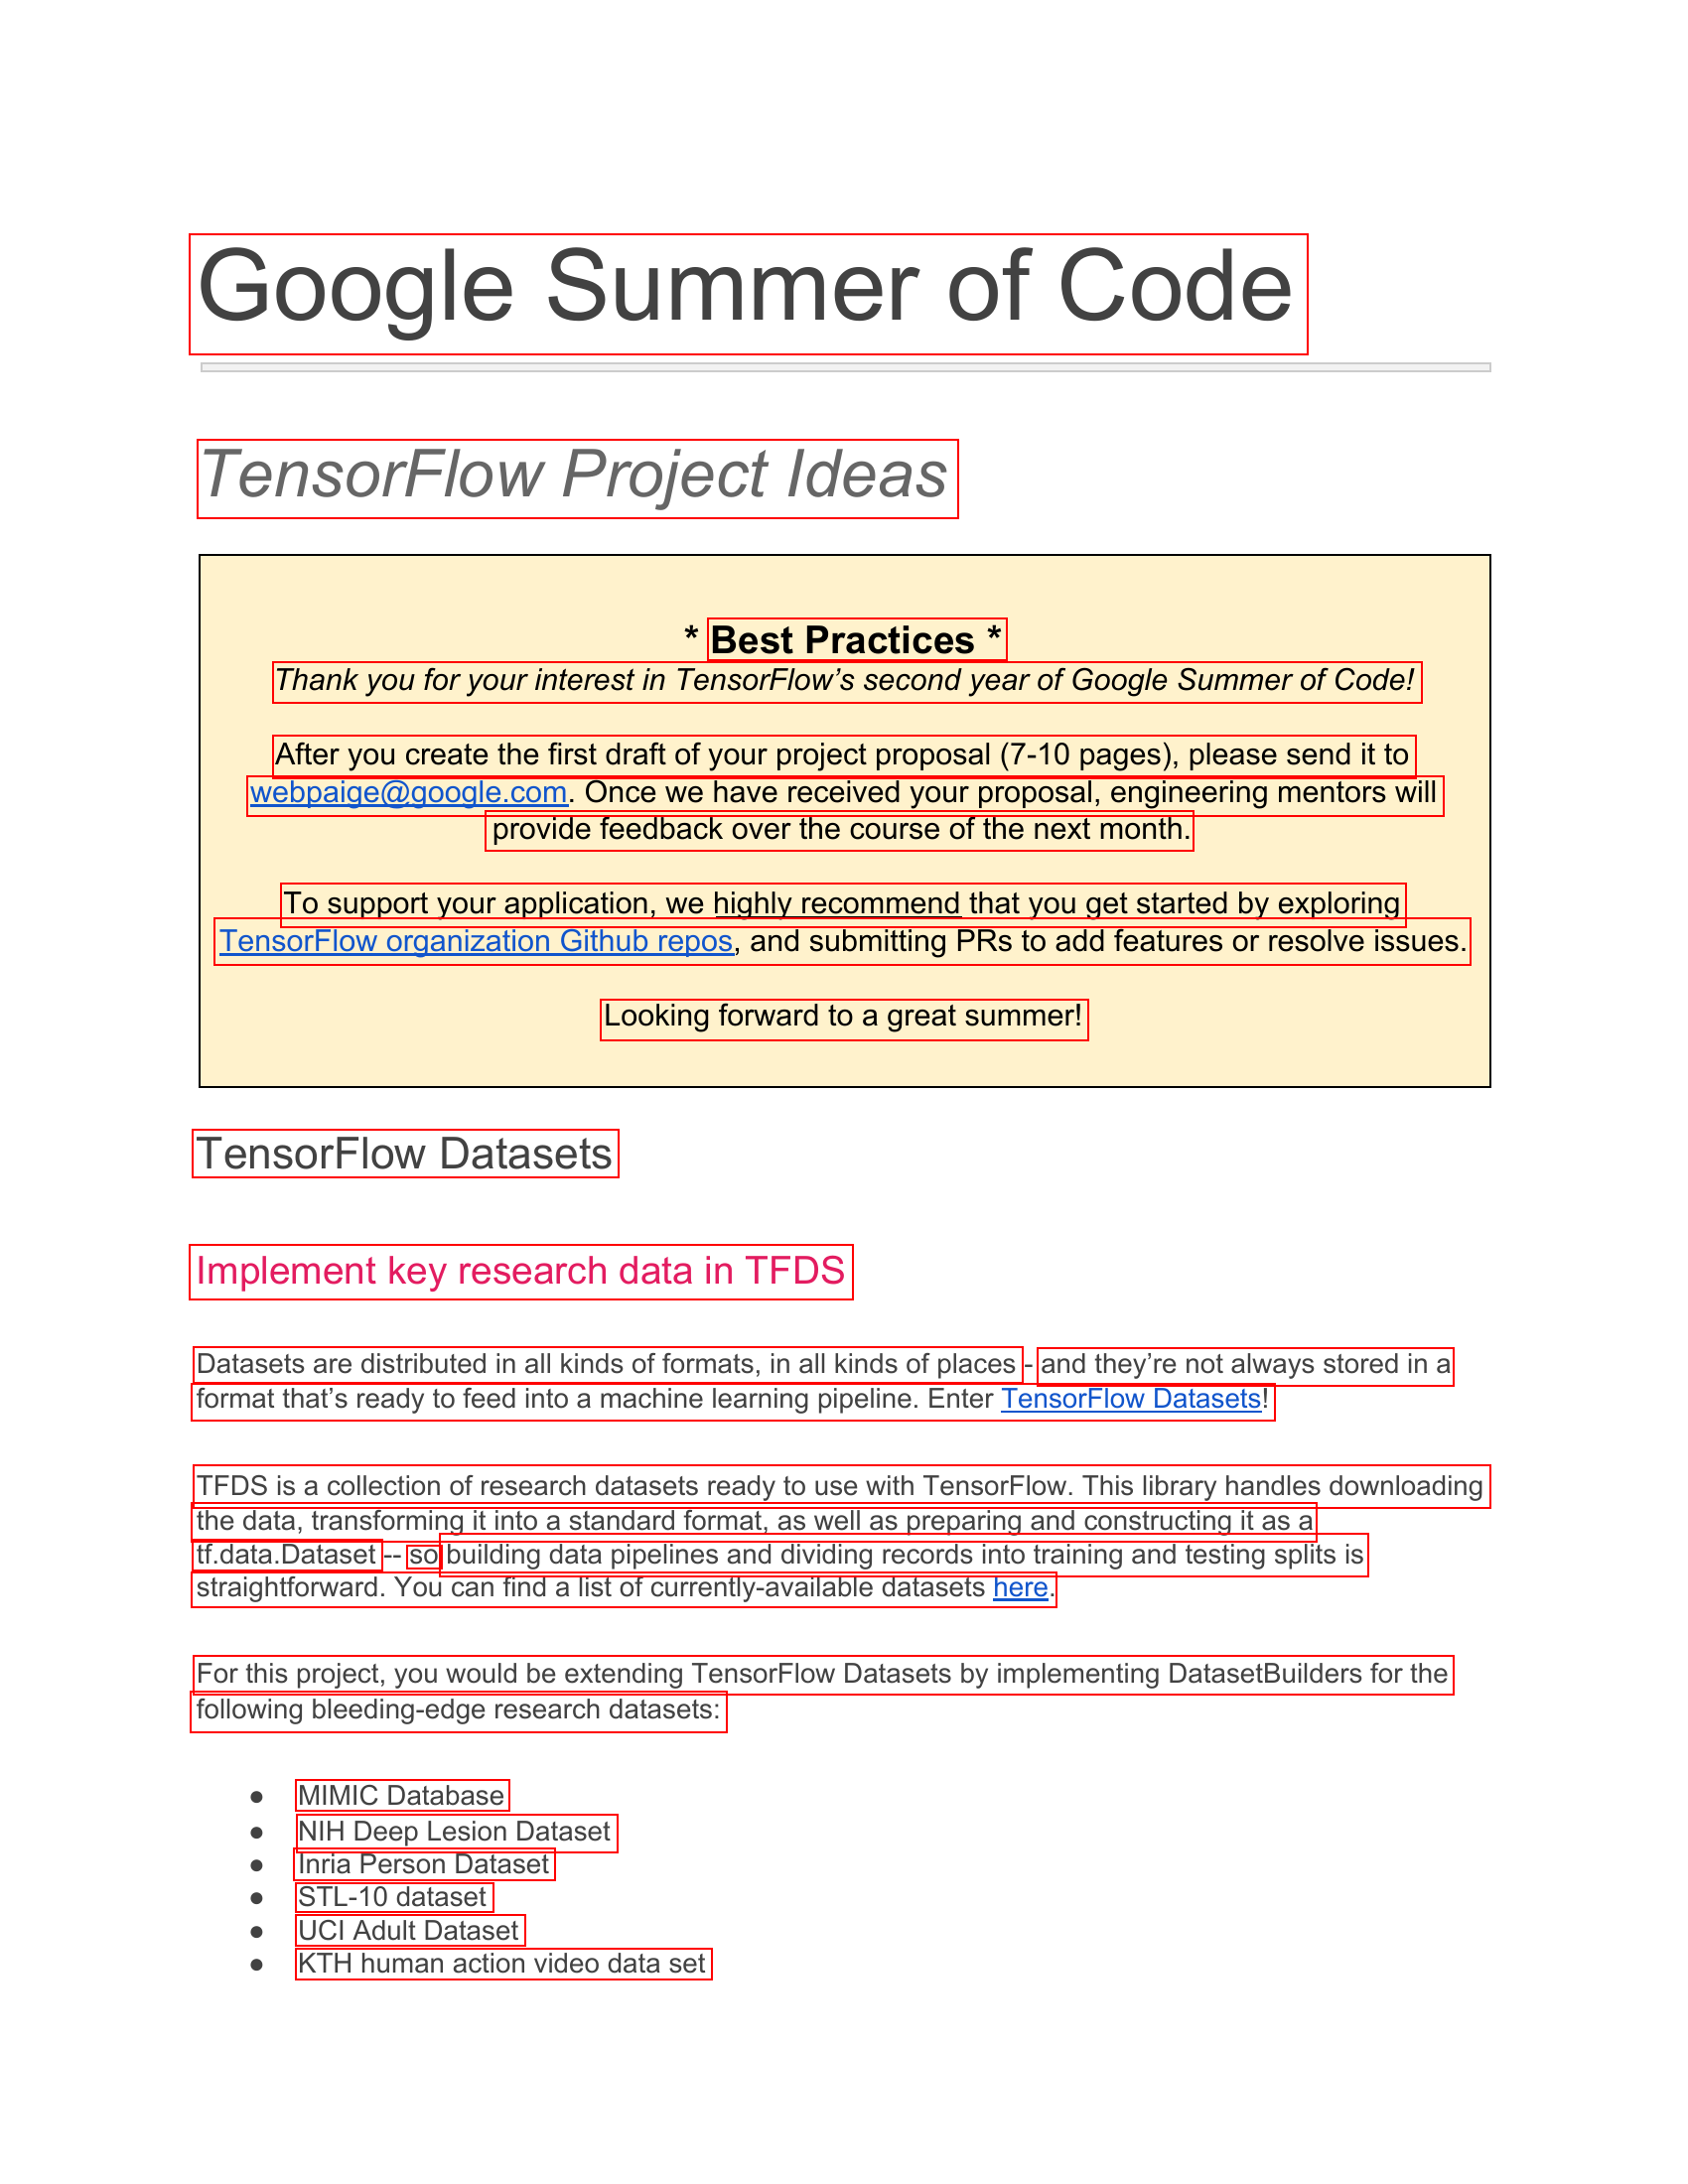

In [53]:
def draw_boxes(image,bounds,color = 'red',width=2):
  draw = ImageDraw.Draw(image)
  for bound in bounds:
    p0,p1,p2,p3 = bound[0]
    draw.line([*p0,*p1,*p2,*p3,*p0],fill = color,width=width)
  return image
draw_boxes(images[0],bounds)

In [54]:
for l in range(len(bounds)):
  for t in range(len(bounds[l])):
    print(bounds[l][t])

[[191, 235], [1316, 235], [1316, 357], [191, 357]]
Google Summer of Code
0.988556502589325
[[199, 442], [964, 442], [964, 522], [199, 522]]
TensorFlow Project Ideas
0.9979606435162781
[[713, 622], [1013, 622], [1013, 665], [713, 665]]
Best Practices *
0.9105719481187741
[[275, 666], [1431, 666], [1431, 708], [275, 708]]
Thank you for your interest in TensorFlow's second year of Google Summer f Codel
0.7954575775895134
[[275, 740], [1425, 740], [1425, 784], [275, 784]]
After you create the first draft of your project proposal (7-10 pages) , please send it to
0.774564809393817
[[249, 781], [1453, 781], [1453, 822], [249, 822]]
webpaige@google com: Once we have received your proposal, engineering mentors will
0.8586875169561909
[[489, 816], [1201, 816], [1201, 857], [489, 857]]
provide feedback over the course of the next month:
0.936243083876071
[[283, 889], [1415, 889], [1415, 934], [283, 934]]
To support your application, we highly recommend that you get started by exploring
0.69179331

In [55]:
bounds[1][1]

'TensorFlow Project Ideas'

In [56]:
text = ''
for i in range(len(bounds)):
  text = text + bounds[i][1] + '\n'
print(text)

Google Summer of Code
TensorFlow Project Ideas
Best Practices *
Thank you for your interest in TensorFlow's second year of Google Summer f Codel
After you create the first draft of your project proposal (7-10 pages) , please send it to
webpaige@google com: Once we have received your proposal, engineering mentors will
provide feedback over the course of the next month:
To support your application, we highly recommend that you get started by exploring
TensorFlow organization Github repos, and submitting PRs to add features or resolve issues.
Looking forward to a great summerl
TensorFlow Datasets
Implement key research data in TFDS
Datasets are distributed in all kinds of formats, in all kinds of places
and they're not always stored in a
format that's ready to feed into a machine learning pipeline. Enter TensorFlow Datasetsl
TFDS is a collection of research datasets ready to use with TensorFlow: This library handles downloading
the data, transforming it into a standard format; as wel as p

In [57]:
nlp = spacy.load('en_core_web_sm')

In [58]:
doc = nlp(text)

In [59]:
from spacy import displacy
displacy.render(nlp(doc.text),style='ent',jupyter=True)